# NCRM Text Data Workshop - part 3: Basic text data analysis
#### Lewys Brace - l.brace@exeter.ac.uk

### 1. What is NLP
Natural Language Processing (NLP) is a sub-field combining linguistics and artificial intelligence. In a technical sense, it is the technology used to aid computers in understanding our natural language. It's ultimate aim is to read, decipher, understand, and make sense of the human languages in a manner that is valuable.

#### NLP applications:
- Personal voice assistants; i.e. Alexa, Google assist, etc.
- Language translation apps; i.e. Google translate.
- Spell and grammar check in Microsoft Office, etc.
- Call centre interactive voice response systems.
- It has become imperative for organisations to have a structure in place to mine actionable insights from the text being generated. From social media analytics, risk management and cybercrime protection, to automating everyday "boring tasks".

#### The difficulties of NLP
- NLP is not simple, but a lot of progress has been made in recent years.
- It's difficult because of the nature of linguistic rules for the passing of information are not easy for computers to understand. For example:
           > The high-level absract rules of sarcasm.
           > Low-level rules, such as using "s" to denote plurals.
- Thus, a comprehensive understanding the human language requires understanding both the words and how the concepts are connected to deliver the intended message.

#### Mistakes happen
- They happen and are natural.
- For example, the biblical phrase below was once translated from English to Russain:
<center>Original English phrase: “The spirit is willing, but the flesh is weak.”</center>
<center>Translated Russain phrase: “The vodka is good, but the meat is rotten.”</center>

#### How does it work?
- NLP involves the application of machine learning algorithms to identify and extract natural language rules, and converting it into a form that computers and understand and work with.
- We can then use the computers to extract the meaning of words and sentences, and therefore draw our data.
- There will always be mistakes!

### 2. Setting up
Let's begin by importing the necessary packages that we'll need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import itertools
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, FreqDist, bigrams
from sklearn.feature_extraction.text import CountVectorizer
from stemming.porter2 import stem
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
from textblob import TextBlob, Word
import collections
import sys

We are then going to use the ``pandas`` package to import the profiles.json file that we created in the last video. Pandas' ``read_json`` function imports the jason file and converts it into a dataframe.

In [2]:
df = pd.read_json("C:/Users/lb690/OneDrive - University of Exeter/Teaching/NLP_workshop/profiles.json")

If we print the dataframe, we can see that the json files is now in dataframe form for us to work with:

In [3]:
print(df)
print(list(df)) #Print the column names

                           name  \
0        Professor Mike Michael   
1           Dr Alexey Bessudnov   
2             Dr Katharine Boyd   
3                Dr Lewys Brace   
4             Dr Angela Cassidy   
..                          ...   
113                Dr Kate Marx   
114  Professor Andrew Pickering   
115           Dr Hilary Wheaton   
116               Daisy Elliott   
117                Mary Tamplin   

                                          page_content    page_url  \
0    \n\n2845\n\n01392 722845\n\nAmory 347\n\nMike ...    michael/   
1    Read more\n\nRead more\n\nRead more\n\nRead mo...  bessudnov/   
2    Read more\n\nRead more\n\nRead more\n\n\n\n564...       boyd/   
3    Read more\n\n\n\n6963\n\n01392 726963\n\nLewys...      brace/   
4    Read more\n\nRead more\n\n\n\n5390\n\n01392 72...    cassidy/   
..                                                 ...         ...   
113                                                NaN       marx/   
114                

### 3. Basic feature extraction

This is a useful first step before implementing any form of NLP. You can think of it like exploratory data analysis when working with quantitative data; it serves to give us a 'feel' for the data.

#### Word count
One of the most basic features we can extract is the number of words in each prfoile's position variable.

This can be done in Python by selecting the cell you want to count the words of, and then using Python's ``len()`` and ``split()`` functions to get the number of words in that cell. However, because we are working with a dataframe and want to apply this to every cell in the ``position`` column, we use the ``split()`` and ``len()`` functions in conjunction with the lambda function. In Python, lambda is just another way to define a function. For example, the line ``df['text'].apply(lambda x: len(x.split(" ")))`` below essentially says:

1. for each string in value (here referred to as x), get the number of elements (denoted by len() function for "length") of of the string when all elements are separated in accordance with where a space (" ") occurs in the string.
2. the df['position'].apply() then says do step one to every document in the dataframe and assign it to the corresponding row in this new column called df['word_count'].

We run that command and then use ``df[['word_count']])`` to view the newly created column that contains the word count for the ``position`` variable for each row.

In [5]:
df['word_count'] = df['position'].apply(lambda x: len(x.split(" ")))
print(df[['word_count']])
print(df)

     word_count
0            39
1            27
2            14
3             4
4            33
..          ...
113           3
114           1
115           2
116           7
117           3

[118 rows x 1 columns]
                           name  \
0        Professor Mike Michael   
1           Dr Alexey Bessudnov   
2             Dr Katharine Boyd   
3                Dr Lewys Brace   
4             Dr Angela Cassidy   
..                          ...   
113                Dr Kate Marx   
114  Professor Andrew Pickering   
115           Dr Hilary Wheaton   
116               Daisy Elliott   
117                Mary Tamplin   

                                          page_content    page_url  \
0    \n\n2845\n\n01392 722845\n\nAmory 347\n\nMike ...    michael/   
1    Read more\n\nRead more\n\nRead more\n\nRead mo...  bessudnov/   
2    Read more\n\nRead more\n\nRead more\n\n\n\n564...       boyd/   
3    Read more\n\n\n\n6963\n\n01392 726963\n\nLewys...      brace/   
4    Read mor

#### Average word length

Calculating the average length of words in a document can be useful when building text classifiers and the like.

Here, we simply take the sum of the length of all the words and divide it by the total length of the document.

We're going to build a funciton to calculate this for us. It is important to note that you must define a function in Python before you call it; i.e. the function code needs to come before the function call.

In [6]:
#First, we create a function that calculates the average word length.
def avg_word(sentence):
  words = sentence.split()
  if len(words) > 0:
      return (sum(len(word) for word in words)/len(words))
  else:
      return 0

#We then apply this function to each row (document) in our dataframe.
#This is assigned to a new variable (column) in our dataframe call avg_word
df['avg_word'] = df['position'].apply(lambda x: avg_word(x))
print(df[['avg_word']])

      avg_word
0     7.775000
1     7.962963
2     9.428571
3     5.500000
4     8.242424
..         ...
113   7.333333
114   9.000000
115   7.500000
116  10.800000
117   8.333333

[118 rows x 1 columns]


#### Number of stop words

Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in Python.

In [7]:
stop = stopwords.words('english')

df['num_stopwords'] = df['position'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(df[['num_stopwords']])

     num_stopwords
0               10
1                3
2                1
3                1
4                5
..             ...
113              0
114              0
115              0
116              0
117              0

[118 rows x 1 columns]


#### Counting special character

Sometimes when working with text data, such as data scraped from Twitter, etc, it is useful to count the number of special characters; i.e. @ and #.

Here, we'll first define a list that contains all of the special characters we're interested in as string objects. We'll then cycle through our dataframe as before, and create a new column which will contain the counts of each of our special characters for that respective row. Here, we then cycle through each of the spcial characters, and if any word begins with one of them, we count it. We then add this count to the spcecial characters dictionaty for this document.

In [9]:
#Define special characters in a dictionary
special_chars_dict = {'hashtags': '#',
                      'twitter_name': '@'}

for key, value in special_chars_dict.items():
    df[key] = df['position'].apply(lambda x: len([x for x in x.split() if x.startswith(value)]))
    print(df[[key]])
print(df)

     hashtags
0           0
1           0
2           0
3           0
4           0
..        ...
113         0
114         0
115         0
116         0
117         0

[118 rows x 1 columns]
     twitter_name
0               0
1               0
2               0
3               0
4               0
..            ...
113             0
114             0
115             0
116             0
117             0

[118 rows x 1 columns]
                           name  \
0        Professor Mike Michael   
1           Dr Alexey Bessudnov   
2             Dr Katharine Boyd   
3                Dr Lewys Brace   
4             Dr Angela Cassidy   
..                          ...   
113                Dr Kate Marx   
114  Professor Andrew Pickering   
115           Dr Hilary Wheaton   
116               Daisy Elliott   
117                Mary Tamplin   

                                          page_content    page_url  \
0    \n\n2845\n\n01392 722845\n\nAmory 347\n\nMike ...    michael/   
1    Re

#### Uppercase count

Sometimes it is useful to count the number of words that are in a specific case; i.e. we often see outrage on the internet being conveyed in block uppercase.

In [10]:
df['num_upper'] = df['position'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
print(df[['num_upper']])

     num_upper
0            0
1            1
2            0
3            0
4            1
..         ...
113          0
114          0
115          0
116          0
117          0

[118 rows x 1 columns]


#### Inspecting the dataframe
We have now added a number of new column containing descriptive data to out dataframe.
We should inspect it before we go any further.

In [11]:
print("df dimensions: ", df.shape)

df dimensions:  (118, 10)


In [12]:
print("df variables list: ", list(df))

df variables list:  ['name', 'page_content', 'page_url', 'position', 'word_count', 'avg_word', 'num_stopwords', 'hashtags', 'twitter_name', 'num_upper']


In [13]:
print("Top five records in df: ", df.head())

Top five records in df:                       name                                       page_content  \
0  Professor Mike Michael  \n\n2845\n\n01392 722845\n\nAmory 347\n\nMike ...   
1     Dr Alexey Bessudnov  Read more\n\nRead more\n\nRead more\n\nRead mo...   
2       Dr Katharine Boyd  Read more\n\nRead more\n\nRead more\n\n\n\n564...   
3          Dr Lewys Brace  Read more\n\n\n\n6963\n\n01392 726963\n\nLewys...   
4       Dr Angela Cassidy  Read more\n\nRead more\n\n\n\n5390\n\n01392 72...   

     page_url                                           position  word_count  \
0    michael/  Professor (Anthropology and Sociology)science ...          39   
1  bessudnov/  Senior Lecturer (Sociology), Director of Educa...          27   
2       boyd/  Senior Lecturer (Sociology)Political and relig...          14   
3      brace/                          Lecturer in Data Analysis           4   
4    cassidy/  Senior Lecturer in Science and Technology Stud...          33   

   avg_word  

### 4. Pre-processing

So, we now have a 'feel' for our textual data. Before we can do anything else, we need to prepare the data for processesing; cleaning it, etc.

#### Convert all text to lowercase
First, we'll transform all words in our documents into lower case. This avoids having multiple copies of the same words; i.e. while calculating the word count, ‘Food’ and ‘food’ will be counted as different words. Here, we'll convert the ``position`` column text into lower case, then overwirte the existing version of this column so that it now contains the all lowercase version of the text.

In [14]:
df['position'] = df['position'].apply(lambda x: " ".join(x.lower() for x in x.split()))
print(df['position'].head())

0    professor (anthropology and sociology)science ...
1    senior lecturer (sociology), director of educa...
2    senior lecturer (sociology)political and relig...
3                            lecturer in data analysis
4    senior lecturer in science and technology stud...
Name: position, dtype: object


#### Remove stopwords and punctuation
What are known as stopword (commonly occurring words such as "and" and "the") should be now be removed from the text data. In addition, we're going to want to remove punctuation as it doesn't provide use with any additional information. Indeed, removing punctuation at this stage is useful when it comes to building your textual training data if you decide to build a text classifier.

The key to this step is all down to how comprehensive your list of stopwords and punctuation is. python packages, such as NLTK, have a number of pre-built stopwords lists that you can just import and use. Alternatively, you can just create your own list entirely. In this exercise, we're going to do a bit of both. We're going to import some lists of stopwords and punctuation from Python packages and then add our own stopwords and special characters to the list.

We're going to use pre-built lists from three packages as our base list; WorldCloud, NLTK, and String. NOTE: this is likely to result in duplication of stop words, but that shouldn't be an issue. But just to be sure, we'll convert it into a set, then back into a list. This will remove any duplicates.

In [15]:
nltk_list = stopwords.words('english')
wordcloud_list = list(set(STOPWORDS))
punct_list = list(string.punctuation)
my_list = ["https", "website", ".", "''", '"']
stopword_punct_list = nltk_list + wordcloud_list + punct_list + my_list
print(stopword_punct_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now we use our stop word list to remove the stopwords and punctuation from our text.

In [16]:
df['position'] = df['position'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword_punct_list))
print(df['position'].head())

0    professor (anthropology sociology)science tech...
1    senior lecturer (sociology), director educatio...
2    senior lecturer (sociology)political religious...
3                               lecturer data analysis
4    senior lecturer science technology studiesscie...
Name: position, dtype: object


#### Tokenisation
Tokenisation is the process whereby convert our text data into a sequence of words or sentences.

For this, we are going to use the word_tokenize() function, which comes form the NLTK package then tokenises our string; i.e. breaks it down into a list where each word in the string becomes an individual element in the list.

Here, we are going to create a new column in which to store our tokenised text data.

We'll then loop through each row in our dataframe and use NLTK's word_tokenize() function in order to convert the single long string that constitutes the document text into individual strings, or tokens. We then write this tokensied version to our new token_doc_dict dictionary.

In order to make this work, we are going to use a for loop to loop through each row (document) in our dataframe. We'll then save the output for each row to a list. Finally, we'll add the elements of this list to a new variable in our dataframe.

In [17]:
token_list = []
for i in range(df.shape[0]):
    token_list.append(TextBlob(df['position'][i]).words)#" ".join(x for df['text'][x] in x.split()))
df['tokens'] = token_list
print(df['tokens'])

0      [professor, anthropology, sociology, science, ...
1      [senior, lecturer, sociology, director, educat...
2      [senior, lecturer, sociology, political, relig...
3                             [lecturer, data, analysis]
4      [senior, lecturer, science, technology, studie...
                             ...                        
113                         [honorary, research, fellow]
114                                          [professor]
115                                  [associate, member]
116    [graduate, research, assistantanthropology, so...
117                      [graduate, research, assistant]
Name: tokens, Length: 118, dtype: object


#### Lemmatisation
Lemmatisation is a more effective option than stemming because it converts the word into its root word instead of merely removing the suffix. In more fancy terms, it therefore makes use of the vocabulary and does a morphological analysis to obtain the root word. Thus, lemmatisation is more widely used than stemming. This is also why we created the temporary new dictionary in the last step, so that we could instead do lemmatisaiton on our current main working dictionary.

In [18]:
df['tokens'] = df['tokens'].apply(lambda x: [Word(word).lemmatize() for word in x])
df['position'] = df['position'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(df['position'])

0      professor (anthropology sociology)science tech...
1      senior lecturer (sociology), director educatio...
2      senior lecturer (sociology)political religious...
3                                 lecturer data analysis
4      senior lecturer science technology studiesscie...
                             ...                        
113                             honorary research fellow
114                                            professor
115                                     associate member
116    graduate research assistantanthropology sociol...
117                          graduate research assistant
Name: position, Length: 118, dtype: object


### 5. Text processing

Now we can move on to some actual text analysis.

#### Bi-grams, tri-grams, and N-grams
N-grams are the combinations of words that used together. Bigrams is where N=2, trigrams where N=3, and so on.

The basic principle of N-grams is to capture the language structure; i.e. what letter or word is likely to follow the one currently under consideration. The longer the N-gram (the larger the N), the more context you have to work with. Optimum size of N depends on the application. If your N-grams are too small, you may fail to capture important differences, but if they are too large, you may fail to capture the “general knowledge” and only stick to particular cases.

For this, we are going to use NLTK's .ngram() function.

As we did above, we are going to use a for loop to loop through all the rows in our dataframe. For each cell, we are going to create a new sub-dataframe where each row contains the ngram words and their frequency. We'll then save this sub-dataframe to a csv file that will be named after the name of the profile currently being evaluated, but with "ngram_freq_" placed before it.

                               bigram  count
0               (science, technology)      2
1           (professor, anthropology)      1
2           (anthropology, sociology)      1
3                (sociology, science)      1
4                 (technology, study)      1
5                  (study, sociology)      1
6               (sociology, everyday)      1
7                    (everyday, life)      1
8               (life, technoscience)      1
9   (technoscience, biotechnological)      1
10     (biotechnological, biomedical)      1
11           (biomedical, innovation)      1
12               (innovation, public)      1
13            (public, understanding)      1
14           (understanding, science)      1
15                  (science, public)      1
16               (public, engagement)      1
17              (engagement, science)      1
18              (technology, process)      1
19             (process, qualitative)      1


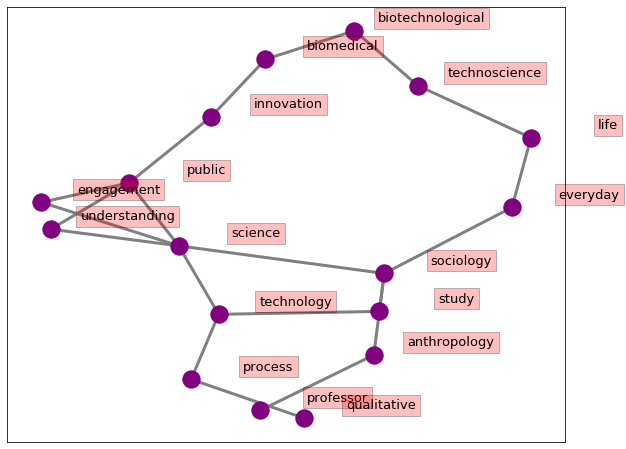

In [19]:
for row in range(0,1):#df.shape[0]):
    bgs = nltk.ngrams(df['tokens'][row], 2)
    dist = FreqDist(bgs)
    doc_ngram_freq_df = pd.DataFrame.from_dict(dist, orient='index', columns = ['Frequency'])
    doc_ngram_freq_df = doc_ngram_freq_df.sort_values('Frequency', ascending=False)
    
    #Get newfile name ready
    profile_name = df['name'][row]
    new_file_name = "ngram_freq_"+profile_name+".csv"
    #save sub-dataframe with ngram information to csv file.
    export_csv = doc_ngram_freq_df.to_csv(new_file_name, header=True)
    
    ## Get the 20 most frequently occurring bi-gram
    bigram_df_top = pd.DataFrame(dist.most_common(20), 
                             columns = ["bigram", "count"])
    print(bigram_df_top)
    
    #Visualise the bi-grams
    d = bigram_df_top.set_index("bigram").T.to_dict("records")
    g = nx.Graph()
    for k, v in d[0].items():
        g.add_edge(k[0], k[1], weight=(v+10))
    fig, ax = plt.subplots(figsize = (10,8))
    pos = nx.spring_layout(g, k = 1)
    nx.draw_networkx(g, pos, font_size = 16, width = 3, edge_color = "grey", node_color = "purple", with_labels = False,
                     ax = ax)      
    for key, value in pos.items():
        x, y = value[0] + .135, value[1] + .045
        ax.text(x,y, s = key, bbox = dict(facecolor = "red", alpha = 0.25), 
                horizontalalignment = "center", fontsize = 13)
    new_file_name = "cooccurance_network_"+str(df.index[row])+".png"
    plt.savefig(new_file_name)

#### Heatmap of terms

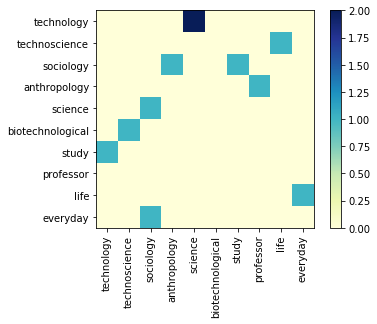

In [20]:
for row in range(0,1):#df.shape[0]):
    top_terms = []
    n = 10
    bi_grams = list(bigrams(df['tokens'][row]))
    bigram_freq = nltk.FreqDist(bi_grams).most_common(n)#len(bi_grams))
    for gram in bigram_freq:
        top_terms.append(gram[0][0])
        top_terms.append(gram[0][1])
    top_terms = list(set(top_terms))
    vocab_index = {word: i for i, word in enumerate(top_terms)}

    co_occurrence_matrix = np.zeros((len(top_terms), len(top_terms)))
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix2 = np.matrix(co_occurrence_matrix)
    data_matrix = pd.DataFrame(co_occurrence_matrix2, index=vocab_index,
                                 columns=vocab_index)
    plt.imshow(data_matrix, cmap="YlGnBu")
    plt.colorbar()
    plt.xticks(range(len(data_matrix)),data_matrix.columns, rotation=90)
    plt.yticks(range(len(data_matrix)),data_matrix.index)
    new_file_name = "heatmap_cooccurance_size_%d_" %(n)
    new_file_name = new_file_name+str(df.index[row])+".png"
    plt.savefig(new_file_name)

#### Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [21]:
for row in range(0,1):#df.shape[0]):
    term_freq_dict = {}
    term_list = list(set(df['tokens'][row]))
    for token in term_list:
        counter = df['tokens'][row].count(token)
        term_freq_all = counter/len(df['tokens'][row])
        term_freq_unique = counter/len(term_list)
        term_freq_dict[token] = [term_freq_all, term_freq_unique]
        
    term_freq_df = pd.DataFrame.from_dict(term_freq_dict, orient='index', columns = ['Ratio whole doc', 'Ratio unique terms'])
    term_freq_df = term_freq_df.sort_values('Ratio unique terms', ascending=False)
    #print(term_freq_df)
    #Get newfile name ready
    new_file_name = "term_freq_"+str(df.index[row])+".csv"
    #save sub-dataframe with ngram information to csv file.
    export_csv = term_freq_df.to_csv(new_file_name, header=True)

#### Visualise wordcloud

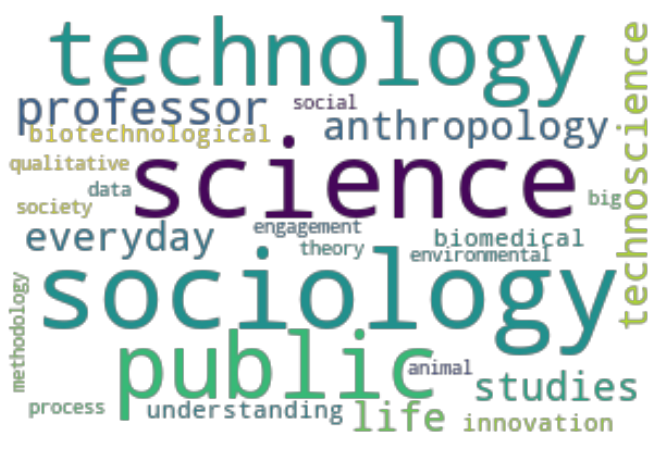

In [24]:
for row in range(0,1):#df.shape[0]):
    wc = WordCloud(max_font_size=50, stopwords = stopword_punct_list, width=300, height=200, min_font_size=6, mode="RGBA", 
                   background_color=None, normalize_plurals=True).generate(df['position'][row])
    plt.figure(figsize=[15,8])
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    new_file_name = "wordcloud_"+str(df.index[row])+".png"
    file_name = (new_file_name)
    plt.savefig(file_name)

#### Sentiment analysis

Before you start looking at more advanced machine learning-based textual data analysis methods, it's worth doing a quick sentiment analysis on your data. For this, we'll use our new TextBlob package again.

By running the text below, we can see that a tuple is return for each document. These two numbers represent the polarity and subjectivity of the document. For the time being, we are only interest in the polarity as this is what indicates the sentiment; the closer it is to -1, the more negative the document, and the closer it is to 1, the more positive the document is. Down the line, we'll use this as feature to build ML models.

In [25]:
sa = df['position'][:5].apply(lambda x: TextBlob(x).sentiment)
print(sa)

0                  (-0.03333333333333334, 0.18)
1    (0.03333333333333333, 0.06666666666666667)
2                                  (0.0, 0.325)
3                                    (0.0, 0.0)
4                    (0.0, 0.06666666666666667)
Name: position, dtype: object


Here, we are just extracting the polarity and looking at it in a dataframe.

In [26]:
df['sentiment'] = df['position'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['position','sentiment']]

position  sentiment
0    professor (anthropology sociology)science tech...  -0.033333
1    senior lecturer (sociology), director educatio...   0.033333
2    senior lecturer (sociology)political religious...   0.000000
3                               lecturer data analysis   0.000000
4    senior lecturer science technology studiesscie...   0.000000
..                                                 ...        ...
113                           honorary research fellow   0.000000
114                                          professor   0.000000
115                                   associate member   0.000000
116  graduate research assistantanthropology sociol...   0.000000
117                        graduate research assistant   0.000000

[118 rows x 2 columns]

# Thanks for watching!

## If you have any questions, please contact l.brace@exeter.ac.uk